In [1]:
import numpy as np   
import matplotlib.pyplot as plt   
import csv   
import pandas as pd   
from pathlib import Path   
from read_roi import read_roi_zip   
from collections import OrderedDict, Counter   
import math   
import PIL   
from PIL import Image   
from PIL.TiffTags import TAGS   
import tkinter as tk   
from tkinter import filedialog   
import seaborn as sns   
import scipy as sp   
from datetime import date   
from pandas.api.types import CategoricalDtype

## Extracting Data ##

In [2]:
today = date.today()
print("Today's date:", today)

Today's date: 2021-09-28


In [3]:
askdirectory = filedialog.askdirectory()
path = Path(askdirectory)
path

WindowsPath('D:/results/2021_WT_R303X_residence')

In [4]:
dates = [x for x in path.iterdir() if x.is_dir()]
dates

[WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT'),
 WindowsPath('D:/results/2021_WT_R303X_residence/2021-summer_photobleaching'),
 WindowsPath('D:/results/2021_WT_R303X_residence/analysis'),
 WindowsPath('D:/results/2021_WT_R303X_residence/Intensities'),
 WindowsPath('D:/results/2021_WT_R303X_residence/R303X_500pM-HUGS_100nM-HUS_100ms_500mspf'),
 WindowsPath('D:/results/2021_WT_R303X_residence/R303X_500pM_100ms'),
 WindowsPath('D:/results/2021_WT_R303X_residence/script'),
 WindowsPath('D:/results/2021_WT_R303X_residence/WT_500pM-HUGS_100nM-HUS_100ms_500mspf'),
 WindowsPath('D:/results/2021_WT_R303X_residence/WT_500pM_100ms')]

In [5]:
folders = []   
for datepath in dates:   
    folders0 = [x for x in datepath.iterdir() if x.is_dir()]   
    folders0 = [i for i in folders0 if (str(i)[-3:] == 'yes') == True]   
    folders = folders + folders0   
      
folders 

[WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT/CH1_DCXGFP050pM_typeWT_DCX000nM_yes'),
 WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT/CH2_DCXGFP050pM_typeWT_DCX200nM_yes')]

In [6]:
DCXconc = '[DCX] ' r'$(n M)$'
DCXGFPconc = '[DCX-GFP] ' r'$(n M)$'
DCX = 'DCX'
DCXGFP = 'DCX GFP'
Type = 'DCX-GFP Type'
Lifetime = 'Lifetime ' r'$(s)$' 

In [7]:
def open_roi_line(path):  
    roi_path = path 
    roi_data = read_roi_zip(roi_path)
    roi_df = pd.DataFrame(columns=['Track ID','x1','x2','y1','y2'])
    for key in roi_data:  
         roi_df = roi_df.append({'Track ID': roi_data[key]['name'],'x1': roi_data[key]['x1'],'x2': roi_data[key]['x2'],'y1': roi_data[key]['y1'],'y2': roi_data[key]['y2']}, ignore_index=True)
    return roi_df 

In [74]:
def line_dynamics(spf,path): 
    dateloc = str(path).rfind('202')
    date = str(path)[dateloc : dateloc+10]  
    
    ch = []
    conc_DCX = []
    conc_DCXGFP = []
    DCX_type = []
    
    CHloc = str(path).find('CH')
    DCXloc = str(path).rfind(DCX)
    DCXGFPloc = str(path).rfind('GFP')
    dcxtype = str(path).find('type')
    ch = ch + [str(path)[CHloc+2:CHloc+3]]
    conc_DCX = conc_DCX + [(str(path)[DCXloc+3:DCXloc+6])]
    conc_DCXGFP = conc_DCXGFP + [(str(path)[DCXGFPloc+3:DCXGFPloc+6])]
    DCX_type = DCX_type + [(str(path)[dcxtype+4:DCXloc-1])]
    
    conc_DCXGFP =  [float(i) for i in conc_DCXGFP]
    conc_DCX =  [float(i) for i in conc_DCX]
    
    data = open_roi_line(path)
    
    n = len(data)
    pre_df = {'Date': np.full((n), date),'CH': np.full((n), ch), DCXGFPconc: np.full((n), conc_DCXGFP), Type: np.full((n), DCX_type), DCXconc: np.full((n), conc_DCX),'spf': np.full((n), spf)}
    df = pd.DataFrame(pre_df)
    
    df['Frames'] = abs((data['y2']-data['y1']))
    df[Lifetime] = abs((data['y2']-data['y1'])*spf)
    
    return df 

In [75]:
files = []
for j in range(0,len(folders)):  
    files0 = [x for x in folders[j].iterdir() if x.is_file()]
    files0 = [i for i in files0 if str(i).rfind('kymotime') != -1]
    files = files + files0
files 

[WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT/CH1_DCXGFP050pM_typeWT_DCX000nM_yes/Stream2-20P_kymotime.tif.zip'),
 WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT/CH1_DCXGFP050pM_typeWT_DCX000nM_yes/Stream40P_kymotime.tif.zip'),
 WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT/CH1_DCXGFP050pM_typeWT_DCX000nM_yes/Untitled2-500mspf-20P_kymotime.tif.zip'),
 WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT/CH2_DCXGFP050pM_typeWT_DCX200nM_yes/Stream2-20P_kymotime.tif.zip'),
 WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT/CH2_DCXGFP050pM_typeWT_DCX200nM_yes/Untitled2_500mspf_20P_kymotime.tif.zip'),
 WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT/CH2_DCXGFP050pM_typeWT_DCX200nM_yes/Untitled2_500mspf_30P_kymotime.tif.zip'),
 WindowsPath('D:/results/2021_WT_R303X_residence/2021-09-15_taxolresDCXWT/CH2_DCXGFP050pM_typeWT_DCX200nM_yes/Untitled3_

In [76]:
frames = pd.DataFrame(columns=[] , index=[])

for i in files:
    filename = i.name
    fileframes = filename.split("kymotime", 1)[0] + 'frame_rates_avg.csv'
    frames0 = pd.read_csv(i.parent/fileframes, encoding='utf-8')
    frames = frames.append(frames0, ignore_index=True)
    
frames

,Directory,Mean,SD,Frames,Outliers,MeanWOutliers,SDWOutliers
0,D:\results\2021_WT_R303X_residence\2021-09-15_...,0.10,0.00,497,0,0.10,0.00
1,D:\results\2021_WT_R303X_residence\2021-09-15_...,0.10,0.00,397,0,0.10,0.00
2,D:\results\2021_WT_R303X_residence\2021-09-15_...,0.54,0.02,497,0,0.54,0.02
3,D:\results\2021_WT_R303X_residence\2021-09-15_...,0.10,0.00,397,0,0.10,0.00
4,D:\results\2021_WT_R303X_residence\2021-09-15_...,0.55,0.02,497,0,0.55,0.02
5,D:\results\2021_WT_R303X_residence\2021-09-15_...,0.55,0.01,497,0,0.55,0.01
6,D:\results\2021_WT_R303X_residence\2021-09-15_...,1.07,0.03,397,0,1.07,0.03


In [77]:
spf = frames['Mean'].values #seconds per frame  
       
data=pd.DataFrame(columns=[] , index=[])  
c = 0  
for i in files:  
    data0 = line_dynamics(spf[c],i) 

#     if str(i).rfind('quence_') != -1 :  
#         data0['Acquisition'] = 2  
#     else:  
#         data0['Acquisition'] = 1  

    data = data.append(data0, ignore_index=True)  
    c += 1  

In [78]:
Type_order = ['WT', 'R303X'] 
category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants 
data[Type] = data[Type].astype(category_Type) 
data = data.sort_values(by=[Type,'spf'])     

data 

,Date,CH,[DCX-GFP] $(n M)$,DCX-GFP Type,[DCX] $(n M)$,spf,Frames,Lifetime $(s)$
0,2021-09-15,1,50.0,WT,0.0,0.10,97.100914,9.710091
1,2021-09-15,1,50.0,WT,0.0,0.10,24.750000,2.475000
2,2021-09-15,1,50.0,WT,0.0,0.10,4.500000,0.450000
3,2021-09-15,1,50.0,WT,0.0,0.10,98.666672,9.866667
4,2021-09-15,1,50.0,WT,0.0,0.10,11.666667,1.166667
...,...,...,...,...,...,...,...,...
237,2021-09-15,2,50.0,WT,200.0,1.07,8.500000,9.095000
238,2021-09-15,2,50.0,WT,200.0,1.07,14.500000,15.515000
239,2021-09-15,2,50.0,WT,200.0,1.07,2.500000,2.675000
240,2021-09-15,2,50.0,WT,200.0,1.07,6.333313,6.776645


In [79]:
newdirectory = str(path)+'//analysis' 
newmydir = Path(newdirectory) 
newmydir.mkdir(exist_ok=True) 

data.to_csv(newmydir/(str(today)+'residence_times.csv'), encoding='utf-8', index=False) 

## Plotting Data ##

In [80]:
black = '#000000' 
grey = '#777777' 
blue = '#23459C' 
cyan = '#0089CF' 
green = '#79BA1A' 
purple = '#AB4A9C' 
magenta = '#D80B8C' 
red = '#e60000' 
orange = '#FF7300' 
yellow = '#FFCB05' 

palette = [cyan,orange]

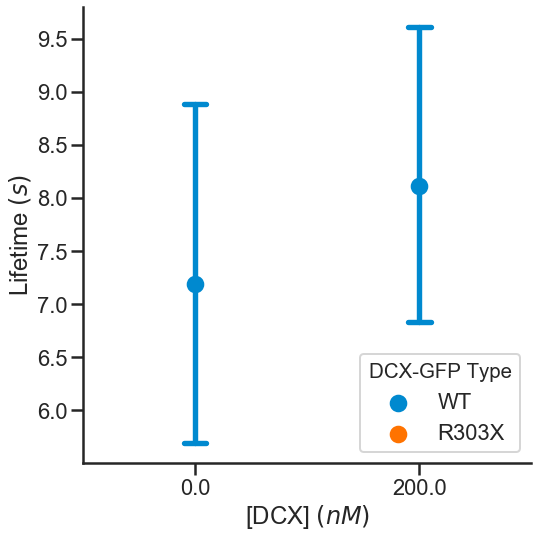

In [81]:
fig, axs = plt.subplots(1,1,figsize=(8,8)) 
sns.set_style('ticks') 


sns.pointplot(x=DCXconc, y=Lifetime, 
hue=Type, err_style='bars', marker='o', join=False, capsize=.1, 
data=data,err_kws={'capsize':10},ci=95, palette = palette) 


sns.despine() 
sns.set_context('poster', font_scale=1, rc={'lines.linewidth' :3.0}) 
plt.tight_layout() 
plt.savefig(newmydir/(str(today)+'residence_times_seaborn.pdf'))

In [82]:
def make_hist(data, dcxtype, dcxconc) : 
          
    selectdata = data[(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)] 

    y=selectdata[Lifetime] 
    fig, ax = plt.subplots(1,1,figsize=(7.45,7.75)) 
    n,bins, patches = ax.hist(y, bins=np.arange(0, 20 + 1, 1), density=True); 
    plt.clf() 

    return n, bins

In [83]:
def exponential(x, scale): 
    return ((np.exp(-(x)/scale) )/(scale)) 

def equation_fit(data): 

    equation = exponential 

    results = pd.DataFrame(columns=[] , index=[]) 

    for dcxtype in data[Type].unique(): 
         for dcxconc in data[DCXconc].unique():  

            n, bins, = make_hist(data, dcxtype, dcxconc); 

            coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n) 

            variance = np.diagonal(var_matrix) #Refer [3] 
            SE = np.sqrt(variance) #Refer [4] 

                 #======Making a data frame======== 
            results0 = pd.DataFrame([coeff,SE], index=(['Mean','SE']),columns= [Lifetime]) 

            results0[DCXconc] = dcxconc 
            results0[Type] = dcxtype 

            results = pd.concat([results, results0], sort=False) 

    return results

In [84]:
datafit = equation_fit(data) 
datafit.to_csv(newmydir/(str(today)+'residence_times_exponentialfit.csv'), encoding='utf-8', index=False) 
datafit

,Lifetime $(s)$,[DCX] $(n M)$,DCX-GFP Type
Mean,4.579620,0.0,WT
SE,0.244568,0.0,WT
Mean,11.445339,200.0,WT
SE,2.775020,200.0,WT


<Figure size 536.4x558 with 0 Axes>

<Figure size 536.4x558 with 0 Axes>

In [85]:
def filter_variable(data, moment, dcxtype):   
    x = datafit.loc[[moment]] 
    x = x[(x[Type] == dcxtype)] 
    return x

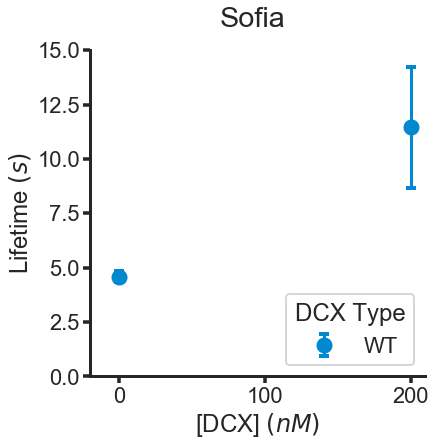

In [86]:
scattersize = 12 
cap = 5 

fig, ax = plt.subplots(1,1,figsize=(6,6)) 

count = 0 

for dcxtype in data[Type].unique(): 

    x = filter_variable(data, 'Mean', dcxtype)[DCXconc].values 

    y = filter_variable(data, 'Mean', dcxtype)[Lifetime].values 
    yerr = filter_variable(data, 'SE', dcxtype)[Lifetime].values 

    ax.errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap, 
                           markeredgewidth=4,elinewidth=3,color=palette[count]) 
    count += 1 

ax.set_xlim(-20,210) 
ax.set_ylim(0,15) 
ax.set_xlabel(DCXconc) 
ax.set_xticks(np.arange(0, 205, 100)) 
ax.set_ylabel(Lifetime) 
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_lw(3) 
ax.spines['bottom'].set_lw(3) 
ax.tick_params(axis='both', width = 3.5, length = 7) 

fig.suptitle('Sofia') 

ax.legend((data[Type].unique()),loc='lower right',title='DCX Type') 
plt.savefig(newmydir/(str(today)+'residence_times_fit.pdf'))

161 WT 0.0
81 WT 200.0


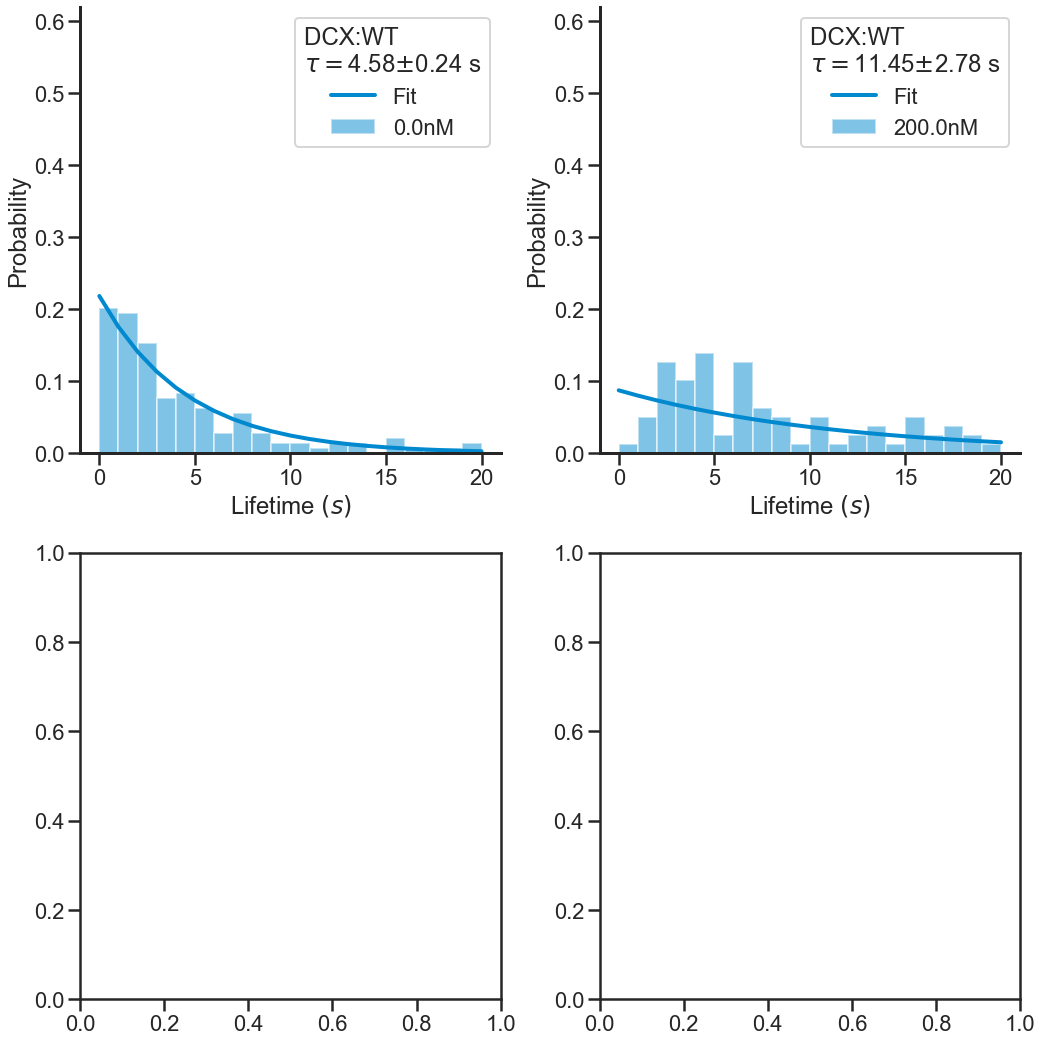

In [87]:
color=cyan 
xlim = 20 
bins = 1 
x = np.arange(0, xlim + bins, bins) 

fig, ax = plt.subplots(2,2,figsize=(15,15)) 

i = 0 
for dcxtype in data[Type].unique(): 
    j = 0 
    scale = filter_variable(data, 'Mean', dcxtype)[Lifetime].values 
    SE = filter_variable(data, 'SE', dcxtype)[Lifetime].values 
    for dcxconc in data[DCXconc].unique(): 

        selectdata = data[(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)] 


        y=selectdata[Lifetime] 

        n,bins, patches = ax[i][j].hist(y, bins=x, density=True , color = palette[i],alpha = 0.5); 

        ax[i][j].plot(x,exponential(x,scale[j]),color = palette[i], lw=4); 

        ax[i][j].set_xlabel(Lifetime) 
        ax[i][j].set_ylabel('Probability') 
        ax[i][j].set_ylim(0,0.62) 
        ax[i][j].spines['right'].set_visible(False) 
        ax[i][j].spines['top'].set_visible(False) 
        ax[i][j].spines['left'].set_lw(3) 
        ax[i][j].spines['bottom'].set_lw(3) 

        scalestr = str(round(scale[j],2)) 
        SEstr = str(round(SE[j],2)) 

        ax[i][j].legend(('Fit',str(dcxconc) + 'nM'),loc='upper right',title='DCX:' + dcxtype +' \n' r'$\tau = $' + scalestr + r'$\pm $'  + SEstr + ' s') 

        print(len(y), dcxtype,dcxconc) 

        j += 1 
    i += 1 

#fig.suptitle('Sofia') 

sns.set_context('poster', font_scale=1, rc={'lines.linewidth' :3.0}) 
plt.tight_layout() 
plt.savefig(newmydir/(str(today)+'residence_times_histogram.pdf'))

161 WT 0.0
81 WT 200.0


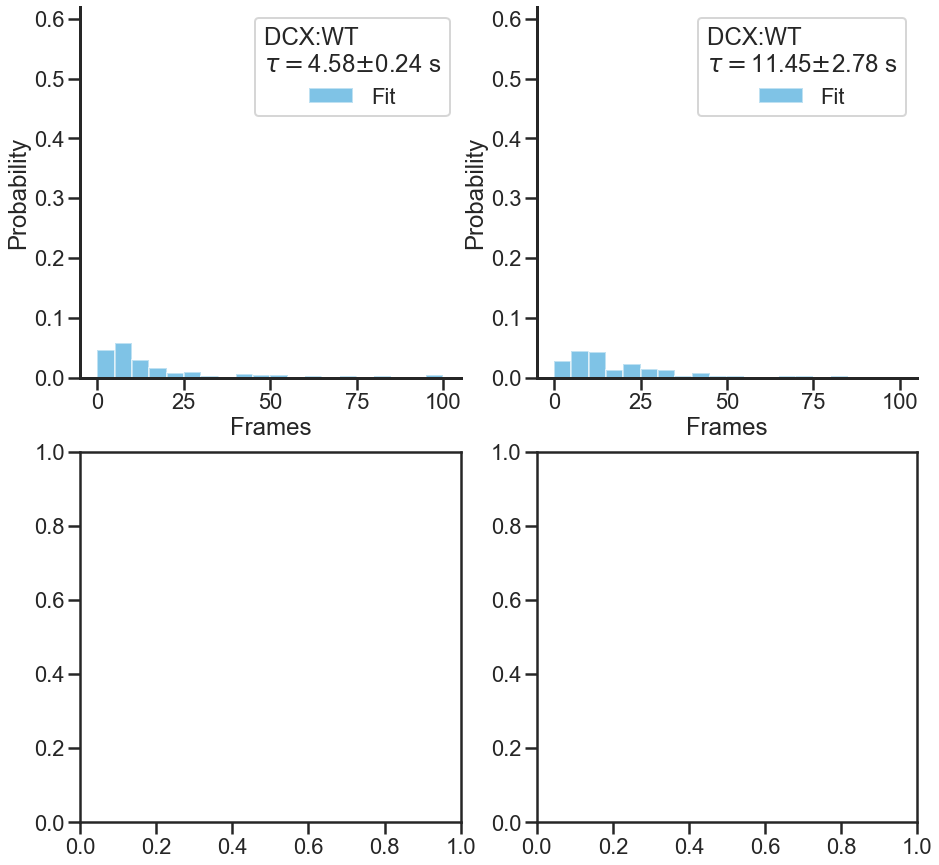

In [95]:
color=green 
xlim = 100 
bins = 5 
x = np.arange(0, xlim + bins, bins) 

fig, ax = plt.subplots(2,2,figsize=(15,15)) 

i = 0 
for dcxtype in data[Type].unique(): 
    j = 0 
    for dcxconc in data[DCXconc].unique(): 

        selectdata = data[(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)] 


        y=selectdata['Frames'] 

        n,bins, patches = ax[i][j].hist(y, bins=x, density=True , color = palette[i],alpha = 0.5); 


        ax[i][j].set_xlabel('Frames') 
        ax[i][j].set_ylabel('Probability') 
        ax[i][j].set_ylim(0,0.62) 
        ax[i][j].spines['right'].set_visible(False) 
        ax[i][j].spines['top'].set_visible(False) 
        ax[i][j].spines['left'].set_lw(3) 
        ax[i][j].spines['bottom'].set_lw(3) 

        scalestr = str(round(scale[j],2)) 
        SEstr = str(round(SE[j],2)) 

        ax[i][j].legend(('Fit',str(dcxconc) + 'nM'),loc='upper right',title='DCX:' + dcxtype +' \n' r'$\tau = $' + scalestr + r'$\pm $'  + SEstr + ' s') 

        print(len(y), dcxtype,dcxconc) 

        j += 1 
    i += 1 

#fig.suptitle('Sofia') 